# Rating Crediticio

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('Assignment 3 credit.csv',delimiter=',')

In [ ]:
df.head()

,checking,duration,history,purpose,amount,savings,employed,installp,marital,coapp,...,property,age,other,housing,existcr,job,depends,telephon,foreign,good_bad
0,1,6,4,3,1169,5,5,4,3,1,...,1,67,3,2,2,3,1,2,1,good
1,2,48,2,3,5951,1,3,2,2,1,...,1,22,3,2,1,3,1,1,1,bad
2,4,12,4,6,2096,1,4,2,3,1,...,1,49,3,2,1,2,2,1,1,good
3,1,42,2,2,7882,1,4,2,3,3,...,2,45,3,3,1,3,2,1,1,good
4,1,24,3,0,4870,1,3,3,3,1,...,4,53,3,3,2,3,2,1,1,bad


Mostramos la información de los datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   checking  1000 non-null   int64 
 1   duration  1000 non-null   int64 
 2   history   1000 non-null   int64 
 3   purpose   1000 non-null   object
 4   amount    1000 non-null   int64 
 5   savings   1000 non-null   int64 
 6   employed  1000 non-null   int64 
 7   installp  1000 non-null   int64 
 8   marital   1000 non-null   int64 
 9   coapp     1000 non-null   int64 
 10  resident  1000 non-null   int64 
 11  property  1000 non-null   int64 
 12  age       1000 non-null   int64 
 13  other     1000 non-null   int64 
 14  housing   1000 non-null   int64 
 15  existcr   1000 non-null   int64 
 16  job       1000 non-null   int64 
 17  depends   1000 non-null   int64 
 18  telephon  1000 non-null   int64 
 19  foreign   1000 non-null   int64 
 20  good_bad  1000 non-null   object
dtypes: int64(19), o

## 2. Análisis y visualización de los datos


**2.1 Examinamos si hay valores faltantes**

In [ ]:
df.isna().any().any()

False

**2.2 Examinamos la columna objetivo**

In [ ]:
df.good_bad.unique()

array(['good', 'bad'], dtype=object)

La columna `good_bad` tiene dos valores:

* good: Representa un buen préstamo
* bad: Representa un préstamo incobrable (incumplido).

Como por convención se representa a los malos prestamos con "1" y buenos prestamos con "0", entonces reemplazamos los valores que vienen por defecto.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
le.fit(df.good_bad)
df.good_bad=le.transform(df.good_bad)
df.good_bad.head(5)

0    1
1    0
2    1
3    1
4    0
Name: good_bad, dtype: int64

A través de un gráfico circular visualizamos estos datos para una mejor comprensión.

In [ ]:
df.columns

Index(['checking', 'duration', 'history', 'purpose', 'amount', 'savings',
       'employed', 'installp', 'marital', 'coapp', 'resident', 'property',
       'age', 'other', 'housing', 'existcr', 'job', 'depends', 'telephon',
       'foreign', 'good_bad'],
      dtype='object')

In [ ]:
df.columns =['checking', 'duration', 'history', 'purpose', 'amount', 'savings',
       'employed', 'installp', 'marital', 'coapp', 'resident', 'property',
       'age', 'other', 'housing', 'existcr', 'job', 'depends', 'telephon',
       'foreign', 'good_bad']

**2.3 Visualizamos gráficamente la columna objetivo**

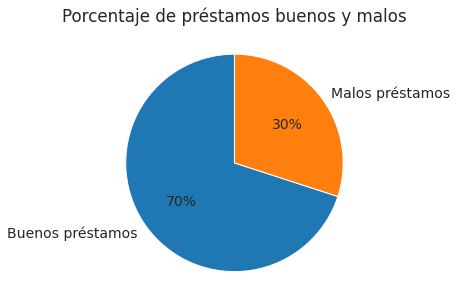

In [ ]:
good_bad_per=round(((df.good_bad.value_counts()/df.good_bad.count())*100))
good_bad_per
plt.pie(good_bad_per,labels=['Buenos préstamos', 'Malos préstamos'], autopct='%1.0f%%', startangle=90)
plt.title('Porcentaje de préstamos buenos y malos');

El gráfico circular muestra que el 30% de los solicitantes de préstamos incumplieron. Vemos que existe un problema de clase desequilibrado, por lo que pasamos a ponderar la clase según su representación.

## 3. Análisis y visualización de los datos exploratorios


**3.1 Exploración de variables continuas**

* Resumen estadístico
* Histogramas
* Diagramas de caja

In [ ]:
df[['amount','duration','age']].describe()

,amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,7.788691,20.903000,35.546000
std,0.776474,12.058814,11.375469
min,5.521461,4.000000,19.000000
25%,7.219276,12.000000,27.000000
50%,7.749107,18.000000,33.000000
75%,8.287088,24.000000,42.000000
max,9.821409,72.000000,75.000000


In [ ]:
df['amount']=np.log(df['amount'])

In [ ]:
df[['amount','duration','age']].describe()

,amount,duration,age
count,1000.000000,1000.000000,1000.000000
mean,2.047685,20.903000,35.546000
std,0.100157,12.058814,11.375469
min,1.708642,4.000000,19.000000
25%,1.976755,12.000000,27.000000
50%,2.047578,18.000000,33.000000
75%,2.114699,24.000000,42.000000
max,2.284565,72.000000,75.000000


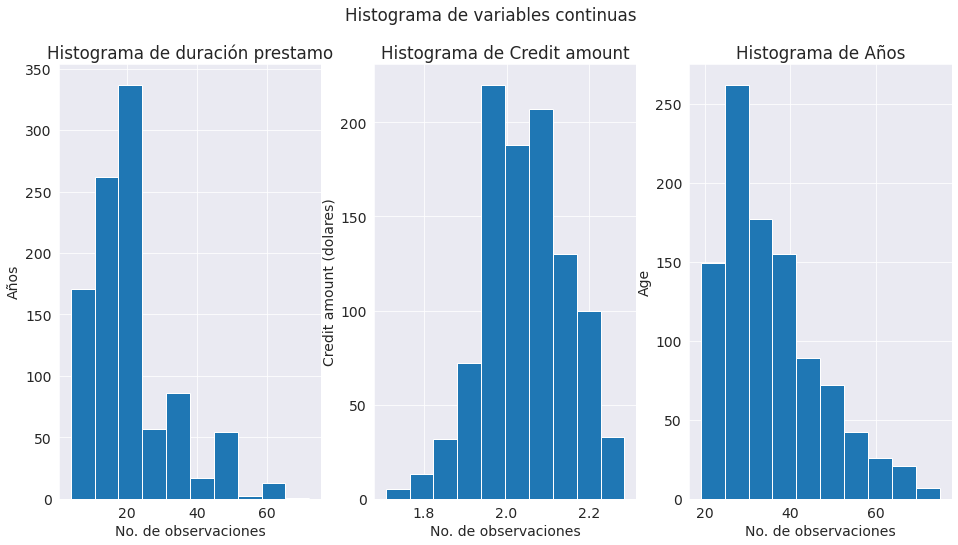

In [ ]:
# histograma de variables continuas

fig, axes = plt.subplots(1,3, figsize=(16,8))
plt.suptitle('Histograma de variables continuas')
axes[0].hist(df['duration'])
axes[0].set_xlabel('No. de observaciones')
axes[0].set_ylabel('Años')
axes[0].set_title('Histograma de duración prestamo');

axes[1].hist(df['amount'])
axes[1].set_xlabel('No. de observaciones')
axes[1].set_ylabel('Credit amount (dolares)')
axes[1].set_title('Histograma de Credit amount');

axes[2].hist(df['age'])
axes[2].set_xlabel('No. de observaciones')
axes[2].set_ylabel('Age')
axes[2].set_title('Histograma de Años');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


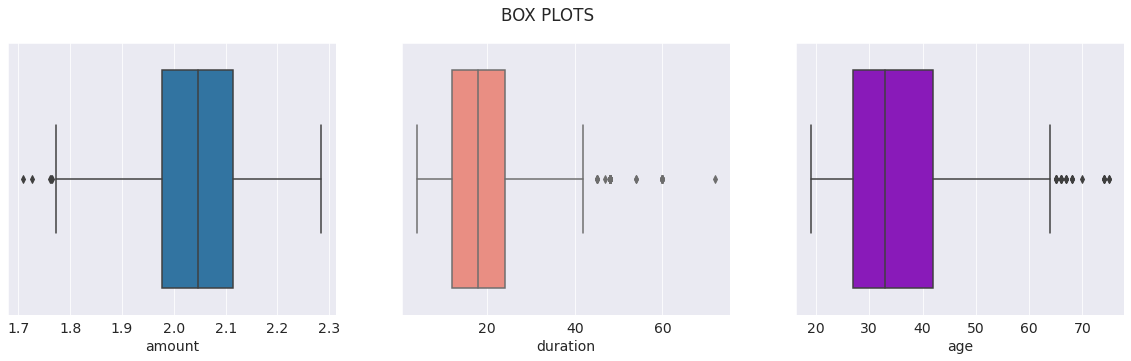

In [ ]:
# box-plots de variables continuas

fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('BOX PLOTS')
sns.boxplot(df['amount'], ax=ax[0]);
sns.boxplot(df['duration'], ax=ax[1], color='salmon');
sns.boxplot(df['age'], ax=ax[2], color='darkviolet');

##Se puede observar que:

* Los diagramas de caja muestran que la mayoría de los montos de los créditos están entre 1000 y 4500 dólares.
* La mayor parte de la duración del préstamo es de 15 a 30 meses. La mayoría de los solicitantes de préstamos tienen entre 28 y 43 años de edad.

**Relación entre el monto del crédito y la duración del reembolso**

* Gráfico de dispersión(scatter plot)

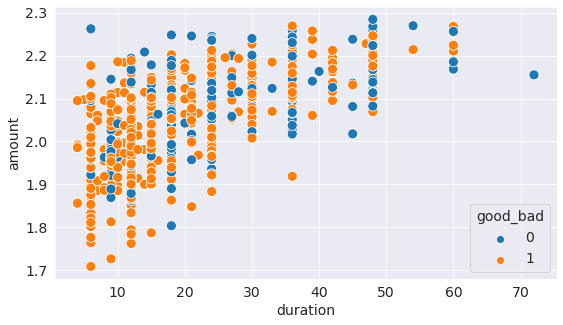

In [ ]:
sns.scatterplot(y=df.amount, 
                x=df.duration, 
                hue=df.good_bad, 
                s=100, 
                );

El diagrama de dispersión muestra que los préstamos más grandes tienen una duración de pago más larga. Los casos en los que se otorgan grandes préstamos con un período de reembolso corto han resultado ser préstamos incobrables.

**3.2 Exploración de variables categóricas**

Relación entre el riesgo de crédito y las habilidades del solicitante del préstamo

Gráfico de barras(Bar-graph)

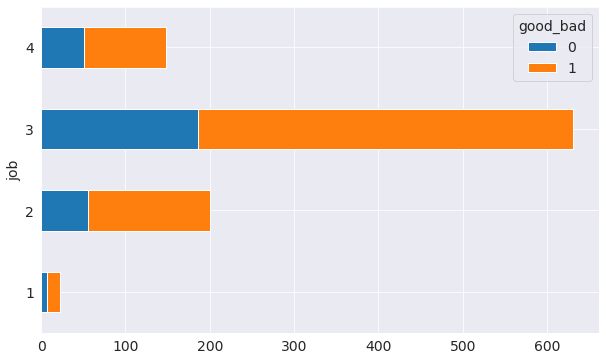

In [ ]:
df.groupby('job')['good_bad'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))

El gráfico muestra que los candidatos que no están empleados o no calificados representan un alto riesgo

**Relación entre el monto del crédito y la duración del préstamo**

* Gráfico de lineas (Line graph)

---



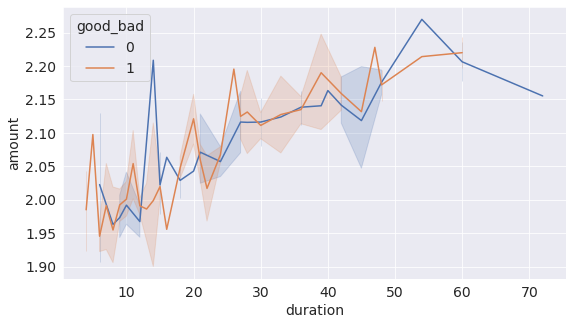

In [ ]:
sns.lineplot(data=df, x='duration', y='amount', hue='good_bad', palette='deep');

Existe una relación lineal entre el monto del crédito y la duración. Cuanto mayor sea el monto del crédito, mayor será la duración del reembolso.

**Relación entre el activo más valioso del candidato y el monto del crédito, riesgo de crédito**

* gráfico de barras apiladas
* gráfico de dispersión

La codificación categórica utilizada en los gráficos es:

* 1: bienes raíces
* 2: si no 1: contrato de ahorro de la sociedad de crédito hipotecario/seguro de vida
* 3: si no 1/2: coche u otro, no en el atributo 6
* 4: desconocido/sin propiedad

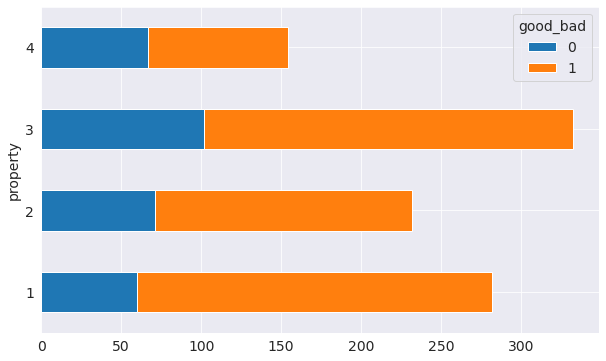

In [ ]:
df.groupby('property')['good_bad'].value_counts().unstack(level=1).plot.barh(stacked=True, figsize=(10, 6))

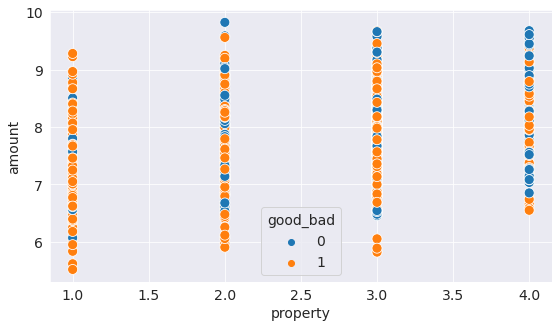

In [ ]:
sns.scatterplot(y=df.amount, 
                x=df.property, 
                hue=df.good_bad, 
                s=100, 
                );

## 4. Codificamos las variables categóricas

* Esto debido a que la mayoría de los modelos de aprendizaje automático no pueden manejar variables categóricas.

In [ ]:
# Número de clases únicas en cada columna de objeto
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

purpose    10
dtype: int64

In [ ]:
# Procesamiento con sklearn para tratar variables categóricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Iteramos a través de las columnas
for col in df:
    if df[col].dtype == 'object':
        # Si hay <= categorías únicas
        if len(list(df[col].unique())) <= 2:
            # Entrenamos con los datos de entrenamiento
            le.fit(df[col])
            # Transformamos los datos de entrenamiento y prueba
            df[col] = le.transform(df[col])

# Codificación one-hot de variables categóricas
df = pd.get_dummies(df)

In [ ]:
# Encontramos correlaciones con good_bad y ordenamos
correlations = df.corr()['good_bad'].sort_values()

# Mostramos correlación
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 coapp        0.025137
telephon     0.036466
purpose_8    0.039281
existcr      0.045732
foreign      0.082079
marital      0.088184
age          0.091127
purpose_1    0.099791
purpose_3    0.106922
other        0.109844
employed     0.116002
savings      0.178943
history      0.228785
checking     0.350847
good_bad     1.000000
Name: good_bad, dtype: float64

Most Negative Correlations:
 duration    -0.214927
property    -0.142612
amount      -0.102869
purpose_0   -0.096900
installp    -0.072404
purpose_6   -0.070088
purpose_9   -0.036129
job         -0.032735
purpose_X   -0.028058
purpose_2   -0.020971
purpose_5   -0.020828
purpose_4   -0.008016
resident    -0.002967
depends      0.003015
housing      0.019315
Name: good_bad, dtype: float64


## 5. Dividimos los datos en particiones de entrenamiento y validación


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x, y = df.drop('good_bad', axis=1), df['good_bad']
x.shape, y.shape

((1000, 29), (1000,))

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((800, 29), (200, 29))

In [ ]:
x_train

,checking,duration,history,amount,savings,employed,installp,marital,coapp,resident,...,purpose_0,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_8,purpose_9,purpose_X
29,1,60,3,2.178150,1,5,3,3,1,4,...,0,0,0,0,0,0,0,0,1,0
535,3,21,4,2.047550,1,2,2,1,1,1,...,0,0,0,0,0,0,1,0,0,0
695,4,6,2,1.962857,3,3,2,3,1,4,...,0,1,0,0,0,0,0,0,0,0
557,4,21,0,2.142157,5,3,1,2,1,4,...,1,0,0,0,0,0,0,0,0,0
836,4,12,2,1.914967,5,3,4,2,1,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4,18,1,2.171687,1,5,2,3,1,4,...,1,0,0,0,0,0,0,0,0,0
270,4,18,2,2.065195,5,4,4,3,1,3,...,1,0,0,0,0,0,0,0,0,0
860,4,24,4,2.159442,4,3,4,3,1,2,...,0,1,0,0,0,0,0,0,0,0
435,2,12,2,1.988216,5,3,2,4,1,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
y_train

29     0
535    0
695    1
557    0
836    1
      ..
106    0
270    1
860    1
435    0
102    1
Name: good_bad, Length: 800, dtype: int64

## 6. Modelos

**Criterios a tomar**

|Criterio| Descripción
|:---|---
|Accuracy| (verdaderos positivos + verdaderos negativos) / total obs
|Precision| verdaderos positivos/ total positivos predichos

* Precisión: El conjunto de datos alemán es un conjunto de datos desequilibrado. La precisión daría una puntuación alta al predecir la clase mayoritaria, pero fallaría al predecir la clase minoritaria, que son los morosos. Por lo tanto, esta no es una métrica adecuada para este conjunto de datos.

* Precisión: La precisión es una buena métrica cuando el costo de los falsos positivos es alto. Ejemplo, detección de correo no deseado.

In [ ]:
import numpy as np

In [ ]:
y.value_counts(normalize=True)

1    0.7
0    0.3
Name: good_bad, dtype: float64

Significa que la precisión de la línea de base es del 70%, es decir, incluso si clasificamos todas las muestras como morosas, tendremos una precisión del 70%.

In [ ]:
#Importamos librerias
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, recall_score, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [ ]:
# Preparamos los modelos
models = []
models.append(('DT', DecisionTreeClassifier(random_state=42)))
models.append(('LR', LogisticRegression(random_state=42)))

## 7. Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Inicializamos el árbol
tree= DecisionTreeClassifier(random_state=42)

fit-predict

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predicción
pred_test= tree.predict(x_test)

In [ ]:
pred_test.shape, y_test.shape

((200,), (200,))

Comprobamos la precisión de los datos predichos

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, pred_test)

0.73

In [ ]:
acc_decision_tree = round(tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

100.0


## 8. Regresión logistica

In [ ]:
tuned_models_test=[]
tuned_models_train=[]

# Creamos el modelo con el parámetro de regularización especificado
log_reg = LogisticRegression(C = 0.0001, random_state=42)

# Entrenamos los datos de entrenamiento
log_reg.fit(x_train, y_train)

# Evaluamos el conjunto de datos de prueba
recall_test= recall_score(y_test,log_reg.predict(x_test))
roc_test=roc_auc_score(y_test,log_reg.predict_proba(x_test)[:, 1])
print('LR',' recall_test:', round(recall_test,2),' auc_roc_test:', round(roc_test,2))
tuned_models_test.append(('LR',' recall_test:', round(recall_test,2),' auc_roc_test:', round(roc_test,2)))

# Evaluamos el conjunto de datos de entrenamiento
roc_train= cross_val_score(log_reg, x_train, y_train, cv=skf, scoring='roc_auc').mean()
recall_train= cross_val_score(log_reg, x_train, y_train, cv=skf, scoring='recall').mean()
print('LR',' recall_train:', round(recall_train,2),' auc_roc_train:', round(roc_train,2))
tuned_models_train.append(('LR',' recall_train:', round(recall_train,2),' auc_roc_train:', round(roc_train,2)))
print(classification_report(y_test, log_reg.predict(x_test)))

LR  recall_test: 1.0  auc_roc_test: 0.6
LR  recall_train: 0.99  auc_roc_train: 0.66
              precision    recall  f1-score   support

           0       1.00      0.12      0.21        59
           1       0.73      1.00      0.84       141

    accuracy                           0.74       200
   macro avg       0.87      0.56      0.53       200
weighted avg       0.81      0.74      0.66       200



## Resumen TEST ACCURACY

|MODEL |TEST ACCURACY 
|:---|---
| Decision Tree|70%
|Logistic Regression|71.2% 